# **Web Scraping & Data Handling Challenge**



### **Website:**

JustWatch - https://www.justwatch.com/in/movies?release_year_from=2000

### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

**a. Movie Information:**

	- Movie title
	- Release year
	- Genre
	- IMDb rating
	- Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
	- URL to the movie page on JustWatch

**b. TV Show Information:**

	- TV show title
	- Release year
	- Genre
	- IMDb rating
	- Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
	- URL to the TV show page on JustWatch

**c. Scope:**

```
	- Scrape data for at least 50 movies and 50 TV shows.
	- You can choose the entry point (e.g., starting with popular movies, or a specific genre, etc.) to ensure a diverse dataset.
```

**2. Data Filtering & Analysis:**

	After scraping the data, use Pandas to perform the following tasks:

**a. Filter movies and TV shows based on specific criteria:**

```
	- Only include movies and TV shows released in the last 2 years (from the current date).
	- Only include movies and TV shows with an IMDb rating of 7 or higher.
```

**b. Data Analysis:**

```
	- Calculate the average IMDb rating for the scraped movies and TV shows.
	- Identify the top 5 genres that have the highest number of available movies and TV shows.
	- Determine the streaming service with the most significant number of offerings.
```

**3. Data Export:**

```
	- Dump the filtered and analysed data into a CSV file for further processing and reporting.
	- Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**

```
	- Submit a link to your Colab made for the assignment.
	- The Colab should contain your Python script (.py format only) with clear comments explaining the scraping, filtering, and analysis process.
	- Your Code shouldn't have any errors and should be executable at a one go.
	- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```


**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.
2. Make sure your code is well-structured, easy to understand, and follows Python best practices.
3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.


## **GitHub Link**

* [GitHub profile](https://www.github.com/FirmBase)
* [GitHub project](https://github.com/FirmBase/Web-Scraping-using-python.git)

# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [1]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [2]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

try:
	# Sending an HTTP GET request to the URL
	page=requests.get(url)
	# Parsing the HTML content using BeautifulSoup with the 'html.parser'
	soup=BeautifulSoup(page.text,'html.parser')
	# Printing the prettified HTML content
	print(soup.prettify())
except requests.exceptions.HTTPError as ex:
	print("HTTP Error:", ex)
except Exception as ex:
	print("Errpr:", ex)

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [3]:
# Write Your Code here
import time

base_url = "/".join(url.split('/')[0:3])
movie_url = []
for link in soup.select("div.title-list-grid__item a.title-list-grid__item--link[href]"):
	if link['href'].split('/')[-2] == 'movie':
		movie_url.append(base_url + link['href'])
# print("\r\n".join(movie_url))
soup_list = []
try:
	for soup_url in movie_url:
		time.sleep(2) # Wait for consecutive requests otherwise exception will be raised, "429 Client Error: Too Many Requests".
		response = requests.get(soup_url)
		response.raise_for_status() # Raise an exception for bad response status codes
		soup_list.append(BeautifulSoup(response.text, 'html.parser'))
except requests.exceptions.HTTPError as ex:
	print(ex)
except Exception as ex:
	print(ex)

## **Scrapping Movie Title**

In [71]:
# Write Your Code here
movie_name = []
try:
	for soup_object in soup_list:
		if len(soup_object.select("div.title-block div h1")) > 0:
			movie_name.append(soup_object.select("div.title-block div h1")[0].text[1:-1])
		else:
			movie_name.append('NaN')
except IndexError as ex:
	print("Index Error:", ex)
except Exception as ex:
	print(ex)
# print(movie_name)

## **Scrapping release Year**

In [72]:
# Write Your Code here
movie_year = []
try:
	for soup_object in soup_list:
		if len(soup_object.select("div.title-block div span.text-muted")) > 0:
			movie_year.append(soup_object.select("div.title-block div span.text-muted")[0].text.strip(' () '))
		else:
			movie_year.append('NaN')
except IndexError as ex:
	print("Index Error:", ex)
except Exception as ex:
	print(ex)
# print(movie_year)

## **Scrapping Genres**

In [73]:
# Write Your Code here
movie_genre = []
for soup_object in soup_list:
	try:
		if len(soup_object.select("div.title-info.title-info h3.detail-infos__subheading")) > 0:
			movie_genre_index = 0
			for element in soup_object.select("div.title-info.title-info h3.detail-infos__subheading"):
				if element.text == "Genres":
					break
				else:
					movie_genre_index += 1
			movie_genre.append(soup_object.select("div.title-info.title-info div.detail-infos__value")[movie_genre_index].text)
		else:
			movie_genre.append('NaN')
	except IndexError as ex:
		print("Index Error:", ex)
	except Exception as ex:
		print(ex)
# print(movie_genre)

## **Scrapping IMBD Rating**

In [74]:
# Write Your Code here
movie_imdb_rating = []
for soup_object in soup_list:
	try:
		movie_imdb_rating_index = 0
		for element in soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value div div.jw-scoring-listing__rating div span img.ls-is-cached.lazyloaded"):
			if element['alt'] == "IMDB":
				break
			else:
				movie_imdb_rating_index += 1
		if len(soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value div div.jw-scoring-listing__rating div span span")) > 0:
			rating = soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value div div.jw-scoring-listing__rating div span span")[movie_imdb_rating_index].text
			movie_imdb_rating.append(re.search(r'\b(\d+(\.\d+)?)\b', rating).group(1) if re.search(r'\b(\d+(\.\d+)?)\b', rating) else 'NaN')
		else:
			movie_imdb_rating.append('NaN')
	except IndexError as ex:
		print("Index Error:", ex)
	except Exception as ex:
		print(ex)
# print(movie_imdb_rating)

## **Scrapping Runtime/Duration**

In [81]:
# Write Your Code here
movie_running_time = []
for soup_object in soup_list:
	movie_running_time_index, movie_running_time_found = 0, False
	for element in soup_object.select("div.title-info.title-info div.detail-infos h3.detail-infos__subheading"):
		if element.text == "Runtime":
			movie_running_time_found = True
			break
		else:
			movie_running_time_index += 1
	if movie_running_time_found:
		movie_running_time.append(soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value")[movie_running_time_index].text)
	else:
		movie_running_time.append('NaN')
# print(movie_running_time)

## **Scrapping Age Rating**

In [76]:
# Write Your Code here
movie_age_rating = []
for soup_object in soup_list:
	movie_age_rating_index, movie_age_rating_found = 0, False
	for element in soup_object.select("div.title-info.title-info div.detail-infos h3.detail-infos__subheading"):
		if element.text == "Age rating":
			movie_age_rating_found = True
			break
		else:
			movie_age_rating_index += 1
	if movie_age_rating_found:
		movie_age_rating.append(soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value")[movie_age_rating_index].text)
	else:
		movie_age_rating.append('NaN')
# print(movie_age_rating)

## **Fetching Production Countries Details**

In [77]:
# Write Your Code here
movie_country = []
for soup_object in soup_list:
	movie_country_index, movie_country_found = 0, False
	for element in soup_object.select("div.title-info.title-info div.detail-infos h3.detail-infos__subheading"):
		if element.text == " Production country ":
			movie_country_found = True
			break
		else:
			movie_country_index += 1
	if movie_country_found:
		movie_country.append(soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value")[movie_country_index].text)
	else:
		movie_country.append('NaN')
# print(movie_country)

## **Fetching Streaming Service Details**

In [78]:
# Write Your Code here
movie_streaming_platform = []
for soup_object in soup_list:
	movie_streaming_platform.append(", ".join([platform.get('alt') for platform in soup_object.find_all('img', class_='offer__icon')]))
# print(movie_streaming_platform)

## **Now Creating Movies DataFrame**

In [79]:
# Write Your Code here
movie_category = ['Movie' for count in range(0, len(soup_list), 1)]
movie_table = zip(movie_name, movie_year, movie_imdb_rating, movie_genre, movie_streaming_platform, movie_running_time, movie_age_rating, movie_country, movie_category, movie_url)

## **Scraping TV  Show Data**

In [3]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

try:
	# Sending an HTTP GET request to the URL
	page=requests.get(tv_url)
	# Parsing the HTML content using BeautifulSoup with the 'html.parser'
	soup=BeautifulSoup(page.text,'html.parser')
	# Printing the prettified HTML content
	print(soup.prettify())
except requests.exceptions.HTTPError as ex:
	print("HTTP Error:", ex)
except Exception as ex:
	print("Errpr:", ex)

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [7]:
# Write Your Code here
import time

base_url = "/".join(tv_url.split('/')[0:3])
television_url = []
for link in soup.select("div.title-list-grid__item a.title-list-grid__item--link[href]"):
	if link['href'].split('/')[-2] == 'tv-show':
		television_url.append(base_url + link['href'])
# print("\r\n".join(television_url))
soup_list = []
try:
	for soup_url in television_url:
		time.sleep(2) # Wait for consecutive requests otherwise exception will be raised, "429 Client Error: Too Many Requests".
		response = requests.get(soup_url)
		response.raise_for_status() # Raise an exception for bad response status codes
		soup_list.append(BeautifulSoup(response.text, 'html.parser'))
except requests.exceptions.HTTPError as ex:
	print(ex)
except Exception as ex:
	print(ex)

https://www.justwatch.com/in/tv-show/shogun-2024
https://www.justwatch.com/in/tv-show/panchayat
https://www.justwatch.com/in/tv-show/mirzapur
https://www.justwatch.com/in/tv-show/game-of-thrones
https://www.justwatch.com/in/tv-show/avatar-the-last-airbender
https://www.justwatch.com/in/tv-show/sunflower-2021
https://www.justwatch.com/in/tv-show/maharani-2021
https://www.justwatch.com/in/tv-show/solo-leveling-2024
https://www.justwatch.com/in/tv-show/maamla-legal-hai
https://www.justwatch.com/in/tv-show/poacher
https://www.justwatch.com/in/tv-show/the-gentlemen
https://www.justwatch.com/in/tv-show/true-detective
https://www.justwatch.com/in/tv-show/young-sheldon
https://www.justwatch.com/in/tv-show/jujutsu-kaisen
https://www.justwatch.com/in/tv-show/aarya
https://www.justwatch.com/in/tv-show/mastram
https://www.justwatch.com/in/tv-show/farzi
https://www.justwatch.com/in/tv-show/avatar-the-last-airbender-2005
https://www.justwatch.com/in/tv-show/one-day
https://www.justwatch.com/in/tv-sh

## **Fetching Tv Show Title details**

In [8]:
# Write Your Code here
television_name = []
try:
	for soup_object in soup_list:
		if len(soup_object.select("div.title-block div h1")) > 0:
			television_name.append(soup_object.select("div.title-block div h1")[0].text[1:-1])
		else:
			television_name.append('NaN')
	# print(television_name)
except IndexError as ex:
	print("Index Error:", ex)
except Exception as ex:
	print(ex)

['Shōgun  (2024)',
 'Panchayat  (2020)',
 'Mirzapur  (2018)',
 'Game of Thrones  (2011)',
 'Avatar: The Last Airbender  (2024)',
 'Sunflower  (2021)',
 'Maharani  (2021)',
 'Solo Leveling  (2024)',
 'Maamla Legal Hai  (2024)',
 'Poacher  (2023)',
 'The Gentlemen  (2024)',
 'True Detective  (2014)',
 'Young Sheldon  (2017)',
 'Jujutsu Kaisen  (2020)',
 'Aarya  (2020)',
 'Mastram  (2020)',
 'Farzi  (2023)',
 'Avatar: The Last Airbender  (2005)',
 'One Day  (2024)',
 'Death and Other Details  (2024)',
 'Halo  (2022)',
 'Supersex  (2024)',
 'Yellowstone  (2018)',
 'Criminal Justice  (2019)',
 'Reacher  (2022)',
 'Indian Police Force  (2024)',
 'Euphoria  (2019)',
 'Loki  (2021)',
 'The Indrani Mukerjea Story: Buried Truth  (2024)',
 'The Rookie  (2018)',
 'The Family Man  (2019)',
 'Scam 1992  (2020)',
 'Money Heist  (2017)',
 'Lucifer  (2016)',
 'Apharan  (2018)',
 'Gullak  (2019)',
 'Gandii Baat  (2018)',
 'Breaking Bad  (2008)',
 'Demon Slayer: Kimetsu no Yaiba  (2019)',
 'Naruto  (2002

## **Fetching Release Year**

In [9]:
# Write Your Code here
television_year = []
try:
	for soup_object in soup_list:
		if len(soup_object.select("div.title-block div span.text-muted")) > 0:
			television_year.append(soup_object.select("div.title-block div span.text-muted")[0].text.strip(' () '))
		else:
			television_year.append('NaN')
	# print(television_year)
except IndexError as ex:
	print("Index Error:", ex)
except Exception as ex:
	print(ex)

['2024',
 '2020',
 '2018',
 '2011',
 '2024',
 '2021',
 '2021',
 '2024',
 '2024',
 '2023',
 '2024',
 '2014',
 '2017',
 '2020',
 '2020',
 '2020',
 '2023',
 '2005',
 '2024',
 '2024',
 '2022',
 '2024',
 '2018',
 '2019',
 '2022',
 '2024',
 '2019',
 '2021',
 '2024',
 '2018',
 '2019',
 '2020',
 '2017',
 '2016',
 '2018',
 '2019',
 '2018',
 '2008',
 '2019',
 '2002',
 '2024',
 '2022',
 '2007',
 '2020',
 '2022',
 '2023',
 '2023',
 '2006',
 '2020',
 '2022',
 '2009',
 '2013',
 '2023',
 '2009',
 '2021',
 '2018',
 '2023',
 '2014',
 '2021',
 '2024',
 '2015',
 '2024',
 '2021',
 '2021',
 '2024',
 '2016',
 '2010',
 '2019',
 '2024',
 '2022',
 '2013',
 '2018',
 '2014',
 '2011',
 '2020',
 '2020',
 '2017',
 '2023',
 '2010',
 '2023',
 '2018',
 '2014',
 '2023',
 '2023',
 '2023',
 '2024',
 '2018',
 '2011',
 '2019',
 '2013',
 '2024',
 '2021',
 '2016',
 '2023',
 '2014',
 '2021',
 '2023',
 '2024',
 '2021',
 '2024']

## **Fetching TV Show Genre Details**

In [10]:
# Write Your Code here
television_genre = []
for soup_object in soup_list:
	try:
		if len(soup_object.select("div.title-info.title-info h3.detail-infos__subheading")) > 0:
			television_genre_index = 0
			for element in soup_object.select("div.title-info.title-info h3.detail-infos__subheading"):
				if element.text == "Genres":
					break
				else:
					television_genre_index += 1
			television_genre.append(soup_object.select("div.title-info.title-info div.detail-infos__value")[television_genre_index].text)
		else:
			television_genre.append('NaN')
	except IndexError as ex:
		print("Index Error:", ex)
	except Exception as ex:
		print(ex)
# print(television_genre)

['Drama, War & Military, History',
 'Drama, Comedy',
 'Crime, Action & Adventure, Drama, Mystery & Thriller',
 'Science-Fiction, Drama, Action & Adventure, Fantasy',
 'Science-Fiction, Action & Adventure, Comedy, Drama, Kids & Family, Fantasy',
 'Comedy, Crime',
 'Drama',
 'Animation, Action & Adventure, Fantasy, Science-Fiction',
 'Drama, Comedy',
 'Drama, Crime',
 'Crime, Action & Adventure, Comedy, Drama',
 'Drama, Mystery & Thriller, Crime',
 'Comedy, Kids & Family',
 'Action & Adventure, Fantasy, Mystery & Thriller, Animation, Science-Fiction',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Drama, Comedy, Fantasy',
 'Crime, Drama, Mystery & Thriller',
 'Action & Adventure, Science-Fiction, Kids & Family, Fantasy, Animation',
 'Drama, Romance, Comedy',
 'Mystery & Thriller, Drama, Crime',
 'Action & Adventure, Science-Fiction, Mystery & Thriller, War & Military',
 'Drama, History',
 'Drama, Western',
 'Drama, Mystery & Thriller, Crime',
 'Drama, Mystery & Thriller, Acti

## **Fetching IMDB Rating Details**

In [11]:
# Write Your Code here
television_imdb_rating = []
for soup_object in soup_list:
	try:
		television_imdb_rating_index = 0
		for element in soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value div div.jw-scoring-listing__rating div span img.ls-is-cached.lazyloaded"):
			if element['alt'] == "IMDB":
				break
			else:
				television_imdb_rating_index += 1
		if len(soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value div div.jw-scoring-listing__rating div span span")) > 0:
			rating = soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value div div.jw-scoring-listing__rating div span span")[television_imdb_rating_index].text
			television_imdb_rating.append(re.search(r'\b(\d+(\.\d+)?)\b', rating).group(1) if re.search(r'\b(\d+(\.\d+)?)\b', rating) else 'NaN')
		else:
			television_imdb_rating.append('NaN')
	except IndexError as ex:
		print("Index Error:", ex)
	except Exception as ex:
		print(ex)
# print(television_imdb_rating)

['9.2',
 '8.9',
 '8.5',
 '9.2',
 '7.3',
 '7.5',
 '7.9',
 '8.5',
 '8.2',
 '7.7',
 '8.3',
 '8.9',
 '7.6',
 '8.6',
 '7.9',
 '7.1',
 '8.4',
 '9.3',
 '8.2',
 '6.8',
 '7.3',
 '6.2',
 '8.7',
 '8.1',
 '8.1',
 '5.1',
 '8.3',
 '8.2',
 '6.3',
 '8.0',
 '8.7',
 '9.3',
 '8.2',
 '8.1',
 '8.3',
 '9.1',
 '3.4',
 '9.5',
 '8.7',
 '8.4',
 '7.9',
 '6.8',
 '8.7',
 '7.4',
 '8.4',
 '7.6',
 '6.1',
 '3.7',
 '6.5',
 '8.6',
 '8.5',
 '8.8',
 '8.7',
 '7.7',
 '8.3',
 '7.9',
 '8.0',
 '7.0',
 '8.7',
 '8.0',
 '8.7',
 '7.0',
 '8.2',
 '7.8',
 '7.0',
 '8.7',
 '8.5',
 '7.4',
 '5.9',
 '8.0',
 '6.5',
 '8.8',
 '8.9',
 '8.5',
 '6.4',
 '8.5',
 '8.0',
 '8.5',
 '8.1',
 '8.1',
 '8.9',
 '7.5',
 '6.4',
 '8.3',
 'NaN',
 '7.2',
 '8.3',
 '8.5',
 '5.8',
 '9.0',
 '6.4',
 '9.2',
 '8.0',
 '7.0',
 '8.0',
 '7.8',
 '7.1',
 '7.8',
 '9.1',
 '7.2']

## **Fetching Age Rating Details**

In [12]:
# Write Your Code here
television_age_rating = []
for soup_object in soup_list:
	television_age_rating_index, television_age_rating_found = 0, False
	for element in soup_object.select("div.title-info.title-info div.detail-infos h3.detail-infos__subheading"):
		if element.text == "Age rating":
			television_age_rating_found = True
			break
		else:
			television_age_rating_index += 1
	if television_age_rating_found:
		television_age_rating.append(soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value")[television_age_rating_index].text)
	else:
		television_age_rating.append('NaN')
# print(television_age_rating)

['NaN',
 'NaN',
 'NaN',
 'U',
 'NaN',
 'A',
 'UA',
 'NaN',
 'NaN',
 'NaN',
 'A',
 'U',
 'U',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'U',
 'A',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'A',
 'A',
 'A',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'U',
 'NaN',
 'NaN',
 'A',
 'U',
 'NaN',
 'NaN',
 'A',
 'NaN',
 'U',
 'NaN',
 'A',
 'NaN',
 'A',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'A',
 'A',
 'U',
 'NaN',
 'NaN',
 'NaN',
 'U',
 'NaN',
 'NaN',
 'NaN',
 'A',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'A',
 'A',
 'NaN',
 'U',
 'NaN',
 'U',
 'NaN',
 'NaN',
 'U',
 'NaN',
 'U',
 'NaN',
 'NaN',
 'NaN',
 'A',
 'NaN',
 'NaN',
 'NaN',
 'A',
 'U',
 'NaN',
 'UA',
 'NaN',
 'NaN',
 'A',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN']

## **Fetching Production Country details**

In [13]:
# Write Your Code here
television_country = []
for soup_object in soup_list:
	television_country_index, television_country_found = 0, False
	for element in soup_object.select("div.title-info.title-info div.detail-infos h3.detail-infos__subheading"):
		if element.text == " Production country ":
			television_country_found = True
			break
		else:
			television_country_index += 1
	if television_country_found:
		television_country.append(soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value")[television_country_index].text)
	else:
		television_country.append('NaN')
# print(television_name)

['United States',
 'India',
 'India',
 'United States',
 'United States',
 'India',
 'India',
 'South Korea, Japan',
 'India',
 'United States, India',
 'United Kingdom, United States',
 'United States',
 'United States',
 'Japan, United States',
 'India',
 'India',
 'India',
 'United States',
 'United Kingdom',
 'United States',
 'United States',
 'Italy',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'Spain',
 'United States',
 'India',
 'India',
 'India',
 'United States',
 'Japan',
 'Japan',
 'United States',
 'India',
 'Japan',
 'India',
 'United States',
 'Iraq, Algeria, Egypt, Indonesia, Lebanon, WEBAPP_COUNTRY_UZ, Japan, Iran, Libya, WEBAPP_COUNTRY_GA, WEBAPP_COUNTRY_AF, Saudi Arabia, Mali, Oman, Morocco, Yemen, Kuwait, WEBAPP_COUNTRY_GM, WEBAPP_COUNTRY_KG, WEBAPP_COUNTRY_MR, Mozambique, Azerbaijan, Qatar, WEBAPP_COUNTRY_BI, WEBAPP_COUNTRY_TM, WEBAPP_COUNTRY_TJ, Burkina Faso, Malaysia

## **Fetching Streaming Service details**

In [14]:
# Write Your Code here
television_streaming_platform = []
for soup_object in soup_list:
	television_streaming_platform.append(", ".join([platform.get('alt') for platform in soup_object.find_all('img', class_='offer__icon')]))
# print(television_streaming_platform)

['Hotstar',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Netflix',
 'VI movies and tv',
 'Sony Liv, VI movies and tv',
 'Crunchyroll, Crunchyroll',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Jio Cinema',
 'Amazon Prime Video, Netflix',
 'Crunchyroll, Netflix, Crunchyroll',
 'Hotstar',
 '',
 'Amazon Prime Video',
 '',
 'Netflix',
 'Hotstar',
 'Jio Cinema',
 'Netflix',
 'Netflix',
 'Hotstar',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Hotstar',
 'Netflix',
 '',
 'Amazon Prime Video',
 'Sony Liv',
 'Netflix',
 'Netflix',
 'Jio Cinema, Alt Balaji',
 'Sony Liv',
 'Alt Balaji',
 'Netflix',
 'Crunchyroll, Netflix, Crunchyroll',
 'Netflix, Amazon Prime Video',
 'Apple TV Plus, Apple TV Plus',
 'Hotstar',
 'Crunchyroll, Netflix, Crunchyroll',
 'MX Player',
 'Jio Cinema',
 'Crunchyroll, Crunchyroll',
 'Amazon Prime Video',
 '',
 'Netflix',
 'Hotstar',
 'Hotstar',
 'Netflix',
 'Jio Cinema',
 'Netflix, Amazon Prime Video',
 'Netflix',
 'Hotstar',
 'Hotst

## **Fetching Duration Details**

In [15]:
# Write Your Code here
television_running_time = []
for soup_object in soup_list:
	television_running_time_index, television_running_time_found = 0, False
	for element in soup_object.select("div.title-info.title-info div.detail-infos h3.detail-infos__subheading"):
		if element.text == "Runtime":
			television_running_time_found = True
			break
		else:
			television_running_time_index += 1
	if television_running_time_found:
		television_running_time.append(soup_object.select("div.title-info.title-info div.detail-infos div.detail-infos__value")[television_running_time_index].text)
	else:
		television_running_time.append('NaN')
# print(television_running_time)

['58min',
 '33min',
 '50min',
 '59min',
 '54min',
 '37min',
 '44min',
 '24min',
 '32min',
 '47min',
 '50min',
 '1h 1min',
 '19min',
 '23min',
 '46min',
 '28min',
 '56min',
 '24min',
 '29min',
 '45min',
 '52min',
 '50min',
 '50min',
 '50min',
 '48min',
 '38min',
 '58min',
 '49min',
 '46min',
 '43min',
 '45min',
 '52min',
 '50min',
 '47min',
 '24min',
 '29min',
 '44min',
 '47min',
 '26min',
 '23min',
 '56min',
 '45min',
 '24min',
 '43min',
 '1h 2min',
 '23min',
 '39min',
 '1h 15min',
 '34min',
 '34min',
 '21min',
 '58min',
 '58min',
 '42min',
 '46min',
 '43min',
 '27min',
 '42min',
 '48min',
 '1h 9min',
 '24min',
 '53min',
 '47min',
 '42min',
 '49min',
 '1h 1min',
 '54min',
 '54min',
 '1h 2min',
 '58min',
 '43min',
 '1h 4min',
 '52min',
 '44min',
 '41min',
 '47min',
 '43min',
 '59min',
 '46min',
 '50min',
 '31min',
 '42min',
 '28min',
 '56min',
 '44min',
 '53min',
 '31min',
 '55min',
 '29min',
 '25min',
 '32min',
 '44min',
 '1h 0min',
 '46min',
 '21min',
 '27min',
 '24min',
 '25min',
 '2

## **Creating TV Show DataFrame**

In [24]:
# Write Your Code here
television_category = ['Television' for count in range(0, len(soup_list), 1)]
television_table = zip(television_name, television_year, television_imdb_rating, television_genre, television_streaming_platform, television_running_time, television_age_rating, television_country, television_category, television_url)

## **Task 2 :- Data Filtering & Analysis**

In [2]:
# Write Your Code here
movie_df = pd.DataFrame(movie_table, columns=['Title', 'Release Year', 'Rating', 'Genre', 'Streaming Platform', 'Runtime', 'Age Rating', 'Country', 'Content Category', 'URL'])
television_df = pd.DataFrame(television_table, columns=['Title', 'Release Year', 'Rating', 'Genre', 'Streaming Platform', 'Runtime', 'Age Rating', 'Country', 'Content Category', 'URL'])

,Title,Release Year,Rating,Genre,Streaming Platform,Runtime,Age Rating,Country,Content Category,URL
0,Oppenheimer (2023),2023,8.3,"History, Drama","Apple TV, Bookmyshow, Amazon Video, Hungama Pl...",3h 0min,UA,"United States, United Kingdom",Movie,https://www.justwatch.com/in/movie/oppenheimer
1,Dune (2021),2021,8.0,"Action & Adventure, Science-Fiction, Drama","Apple TV, Netflix, Bookmyshow, Amazon Video, A...",2h 35min,UA,United States,Movie,https://www.justwatch.com/in/movie/dune-2021
2,Hanu-Man (2024),2024,8.3,"Science-Fiction, Fantasy, Action & Adventure, ...",Jio Cinema,2h 39min,UA,India,Movie,https://www.justwatch.com/in/movie/hanu-man
3,Animal (2023),2023,6.3,"Action & Adventure, Crime, Drama, Mystery & Th...","Netflix, Bookmyshow",3h 21min,A,India,Movie,https://www.justwatch.com/in/movie/animal-2022
4,Poor Things (2023),2023,8.0,"Comedy, Drama, Romance, Science-Fiction","Apple TV, Hotstar, Apple TV, Google Play Movie...",2h 21min,A,"United States, Ireland, United Kingdom",Movie,https://www.justwatch.com/in/movie/poor-things


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [1]:
# Write Your Code here
movie_df['Rating'] = movie_df['Rating'].apply(lambda rating: np.NaN if rating == 'NaN' else float(rating))
television_df['Rating'] = television_df['Rating'].apply(lambda rating: np.NaN if rating == 'NaN' else float(rating))
print("Mean rating for movies:", movie_df['Rating'].mean())
print("Mean rating for TV:", television_df['Rating'].mean())

Mean rating for movies: 7.137373737
Mean rating for TV: 7.848


## **Analyzing Top Genres**

In [ ]:
# Concatenate two tables for analyzing
df = pd.concat([movie_df, television_df], ignore_index=True)

In [14]:
# Write Your Code here
df_top_rating = df[df['Rating'] > df['Rating'].mean()]
df_top_genre = df['Genre']
top_genre = set(g for s in df_top_genre for g in s.split(', '))
top_genre

{'Action & Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'History',
 'Horror',
 'Kids & Family',
 'Made in Europe',
 'Music & Musical',
 'Mystery & Thriller',
 'Reality TV',
 'Romance',
 'Science-Fiction',
 'Sport',
 'War & Military',
 'Western'}

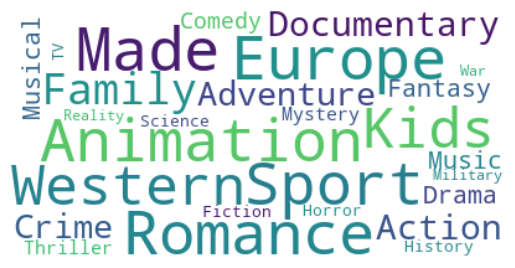

In [18]:
# Let's Visvalize it using word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(top_genre))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Finding Predominant Streaming Service**

In [30]:
# Write Your Code here
df['Streaming Platform']

0      Apple TV, Bookmyshow, Amazon Video, Hungama Pl...
1      Apple TV, Netflix, Bookmyshow, Amazon Video, A...
2                                             Jio Cinema
3                                    Netflix, Bookmyshow
4      Apple TV, Hotstar, Apple TV, Google Play Movie...
                             ...                        
195                                              Hotstar
196                                        Amazon miniTV
197                                           Jio Cinema
198                                              Hotstar
199                                              Netflix
Name: Streaming Platform, Length: 200, dtype: object

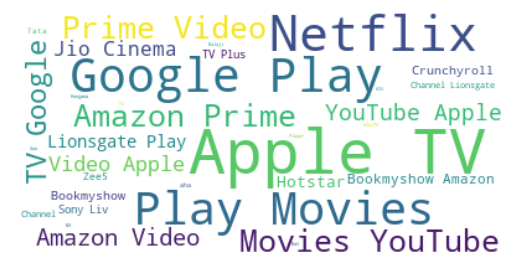

In [29]:
# Let's Visvalize it using word cloud
word_cloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(element for element in df['Streaming Platform'] if type(element) is str))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Task 3 :- Data Export**

In [80]:
# saving final dataframe as Final Data in csv format
import csv
movie_df.to_csv("JustWatch Web Scrapped Movies.csv", index=False)

('Oppenheimer  (2023)', '2023', '8.3', 'History, Drama', 'Apple TV, Bookmyshow, Amazon Video, Hungama Play, Apple TV, Google Play Movies, YouTube, Apple TV, Google Play Movies, YouTube', '3h 0min', 'UA', 'United States, United Kingdom', 'Movie', 'https://www.justwatch.com/in/movie/oppenheimer')
('Dune  (2021)', '2021', '8.0', 'Action & Adventure, Science-Fiction, Drama', 'Apple TV, Netflix, Bookmyshow, Amazon Video, Apple TV, Google Play Movies, YouTube, Apple TV, Google Play Movies, YouTube', '2h 35min', 'UA', 'United States', 'Movie', 'https://www.justwatch.com/in/movie/dune-2021')
('Hanu-Man  (2024)', '2024', '8.3', 'Science-Fiction, Fantasy, Action & Adventure, Comedy', 'Jio Cinema', '2h 39min', 'UA', 'India', 'Movie', 'https://www.justwatch.com/in/movie/hanu-man')
('Animal  (2023)', '2023', '6.3', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Netflix, Bookmyshow', '3h 21min', 'A', 'India', 'Movie', 'https://www.justwatch.com/in/movie/animal-2022')
('Poor Things  (2023)'

In [17]:
# saving filter data as Filter Data in csv format
television_df.to_csv("JustWatch Web Scrapped TV Shows.csv", index=False)

('Shōgun  (2024)', '2024', '9.2', 'Drama, War & Military, History', 'Hotstar', '58min', 'NaN', 'United States', 'Television', 'https://www.justwatch.com/in/tv-show/shogun-2024')
('Panchayat  (2020)', '2020', '8.9', 'Drama, Comedy', 'Amazon Prime Video', '33min', 'NaN', 'India', 'Television', 'https://www.justwatch.com/in/tv-show/panchayat')
('Mirzapur  (2018)', '2018', '8.5', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Amazon Prime Video', '50min', 'NaN', 'India', 'Television', 'https://www.justwatch.com/in/tv-show/mirzapur')
('Game of Thrones  (2011)', '2011', '9.2', 'Science-Fiction, Drama, Action & Adventure, Fantasy', 'Jio Cinema', '59min', 'U', 'United States', 'Television', 'https://www.justwatch.com/in/tv-show/game-of-thrones')
('Avatar: The Last Airbender  (2024)', '2024', '7.3', 'Science-Fiction, Action & Adventure, Comedy, Drama, Kids & Family, Fantasy', 'Netflix', '54min', 'NaN', 'United States', 'Television', 'https://www.justwatch.com/in/tv-show/avatar-the-las

# **Dataset Drive Link (View Access with Anyone) -**

* [JustWatch Web Scrapped Movies](https://raw.githubusercontent.com/FirmBase/Web-Scraping-using-python/main/Dataset/JustWatch%20Web%20Scrapped%20Movies.csv)

* [JustWatch Web Scrapped TV Shows](https://raw.githubusercontent.com/FirmBase/Web-Scraping-using-python/main/Dataset/JustWatch%20Web%20Scrapped%20TV%20Shows.csv)